In [145]:
#Importing the dependencies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [146]:
data= pd.read_csv("C:/Users/shubh/Downloads/loan_dataset.csv")

In [147]:
#Data analysis
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [148]:
data.shape


(614, 13)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [150]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [151]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [152]:
#Data Preprocessing 

In [153]:
imputer= SimpleImputer(strategy='most_frequent')
data= pd.DataFrame(imputer.fit_transform(data),columns=data.columns)

In [154]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [156]:
data.drop('Loan_ID',axis=1,inplace=True)

In [157]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [158]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object': 
        data[col]=le.fit_transform(data[col])

In [159]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,73,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1


In [160]:
#splitting the data 
X = data.drop('Loan_Status',axis=1)
Y = data['Loan_Status']

In [161]:
print(X,Y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0              376   
1         1        1           1          0              0              306   
2         1        1           0          0              1              139   
3         1        1           0          1              0               90   
4         1        0           0          0              0              381   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0              125   
610       1        1           3          0              0              275   
611       1        1           1          0              0              431   
612       1        1           2          0              0              422   
613       0        0           0          0              1              306   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

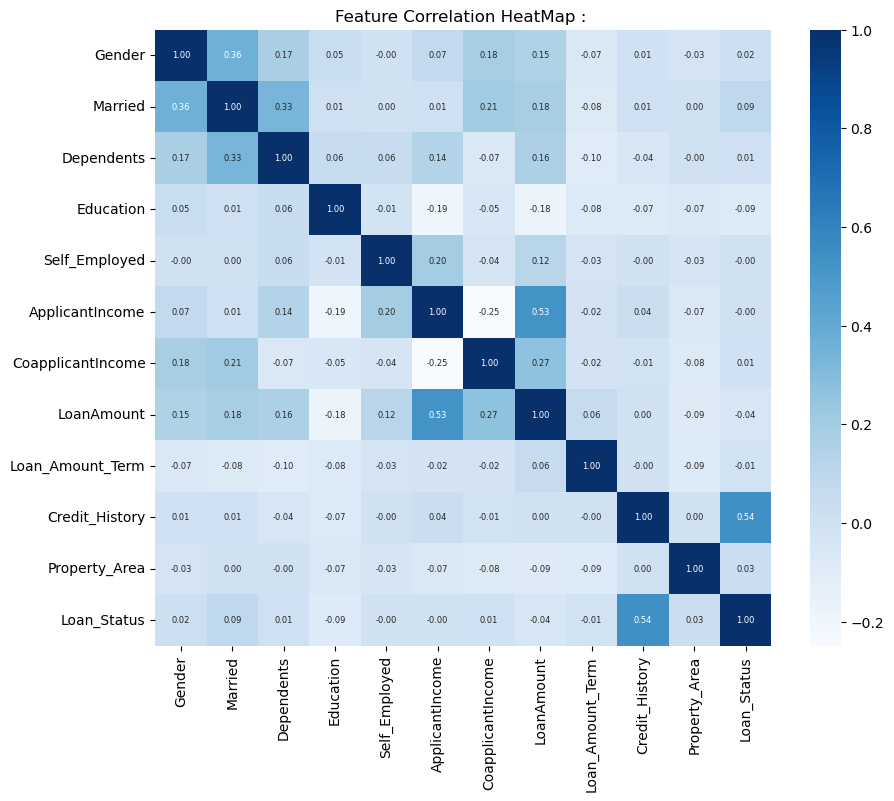

In [162]:
correlation= data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,cbar=True,square=True,cmap='Blues',annot=True,annot_kws={'size':6},fmt='.2f')
plt.title('Feature Correlation HeatMap : ')
plt.show()

In [163]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)
print(X.shape,X_train.shape,X_test.shape)

(614, 11) (491, 11) (123, 11)


In [164]:
#ensemble model building
#Base model - >
mod1 = LogisticRegression(max_iter=2000)
mod2= DecisionTreeClassifier()
mod3= RandomForestClassifier()

#ensemble model -> 
voting_mod= VotingClassifier(estimators=[('m1',mod1),('m2',mod2),('m3',mod3)],voting='hard')
voting_mod.fit(X_train,Y_train)

VotingClassifier(estimators=[('m1', LogisticRegression(max_iter=2000)),
                             ('m2', DecisionTreeClassifier()),
                             ('m3', RandomForestClassifier())])

In [165]:
#Accuracy score and classification report of the training data
Y_train_pred= voting_mod.predict(X_train)
print(f'The Accuracy Score of the training data is {accuracy_score(Y_train,Y_train_pred)} and Classification report for the training data is : {classification_report(Y_train,Y_train_pred)}')

The Accuracy Score of the training data is 1.0 and Classification report for the training data is :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      1.00      1.00       330

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [166]:
Y_test_pred = voting_mod.predict(X_test)
print(f'The Accuracy Score of the Test data is {accuracy_score(Y_test,Y_test_pred)} and the Classification report for the test data is:\n {classification_report(Y_test,Y_test_pred)}')

The Accuracy Score of the Test data is 0.7967479674796748 and the Classification report for the test data is:
               precision    recall  f1-score   support

           0       0.67      0.39      0.49        31
           1       0.82      0.93      0.87        92

    accuracy                           0.80       123
   macro avg       0.74      0.66      0.68       123
weighted avg       0.78      0.80      0.78       123



Text(50.722222222222214, 0.5, 'Actual')

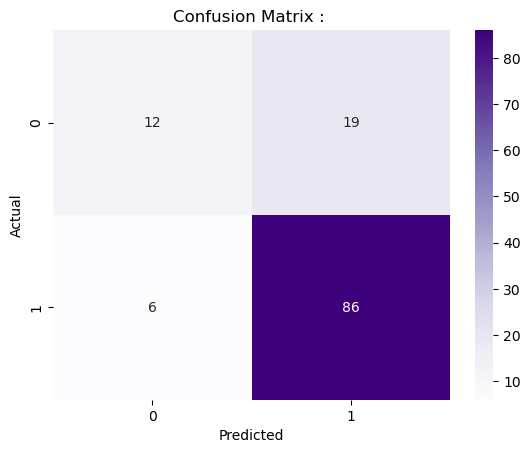

In [167]:
conf = confusion_matrix(Y_test,Y_test_pred)
sns.heatmap(conf,annot=True,fmt='d',cmap='Purples')
plt.title('Confusion Matrix : ')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [194]:
#Predictive System
input_data= (1,0,0,0,0,376,0,73,8,1,2)
numpy= np.asarray(input_data)
reshaped= numpy.reshape(1,-1)
pred= voting_mod.predict(reshaped)
if(pred[0]==1): 
    print('Your Loan will be Approved !!!!')
else:
    print('Your Loan will most Likely not approve !!!!')

Your Loan will be Approved !!!!
